### 목표
 - 실제 데이터인 mpg 데이터의 특징을 파악하고 분석해보자
 - mpg(mile per gallon)는 미국환경 보호국에서 공개한 데이터
 - 1999~ 2008 년 출시된 자동차 234종 정보

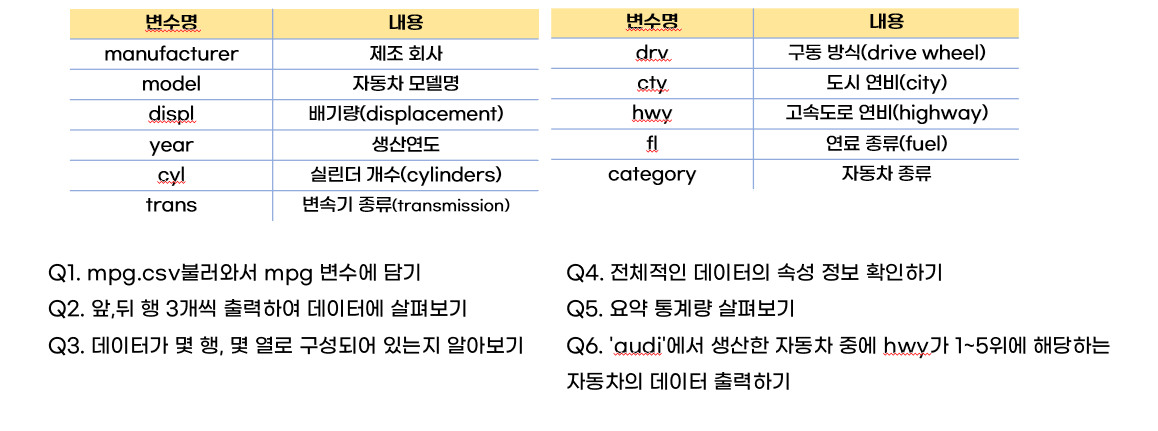

In [1]:
import pandas as pd
# q1.데이터 mpg 변수에 불러와서 담기
mpg = pd.read_csv('./data/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [2]:
# q2. 앞에서 3개 행 출력
mpg.head(3)
# 뒤에서 3개 행 출력
mpg.tail(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [3]:
# q3. 행열 크기 확인 
mpg.shape

(234, 11)

In [4]:
# q4. 데이터 속성 정보 확인
mpg.info()
# 결측치 x 
# object 문자열
# float 실수
# int 정수 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [5]:
# q5. 요약 통계량 살펴보기 
# describe() : 숫자 형태로 된 컬럼만 출력 
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [6]:
mpg[['manufacturer','model']].describe()

,manufacturer,model
count,234,234
unique,15,38
top,dodge,caravan 2wd
freq,37,11


In [7]:
# 6.audi 데이터 접근 후 'hwy'컬럼 내림차순 정렬하여 5개 행만 보기
# 불리언인덱싱, query(), 2차원.sort_values(by='컬럼'), head()
mpg[mpg['manufacturer'] == 'audi'].sort_values('hwy', ascending = False).head()
mpg.query('manufacturer == "audi"').sort_values('hwy', ascending = False).head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


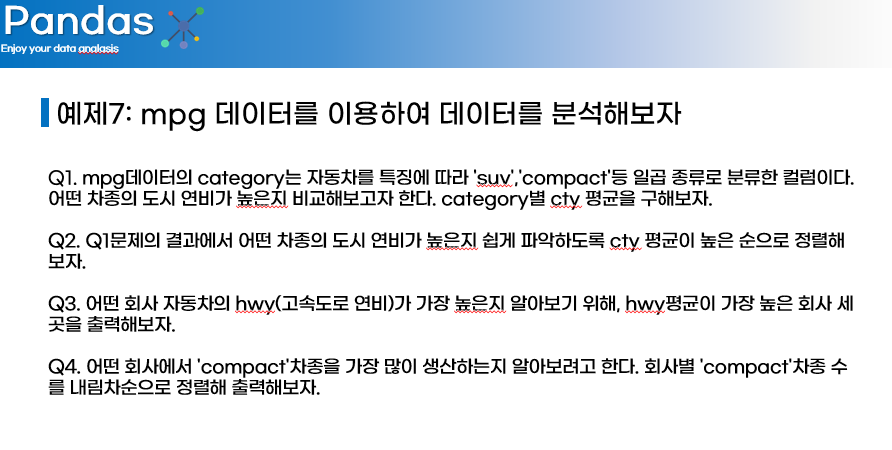

In [30]:
# q1.
# mpg[['category','cty']].groupby('category').mean()
mpg.groupby('category').agg(cty_mean = ('cty','mean'))
cty_mean = mpg[['category','cty']].groupby('category').agg(cty_mean = ('cty','mean'))
cty_mean

,cty_mean
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


In [31]:
# q2.
cty_mean.sort_values(by = 'cty_mean', ascending = False)

,cty_mean
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


In [37]:
# q3.
mpg.groupby('manufacturer').agg(hwy_mean = ('hwy','mean')).sort_values(by='hwy_mean', ascending = False).head(3)
mpg.groupby('manufacturer').agg(hwy_mean = ('hwy','mean')).sort_values(by='hwy_mean', ascending = False).iloc[:3]

,hwy_mean
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


In [ ]:
# q4. compact 차종 정보 접근 > 회사별로 묶기 > 카운트 함수 > 결과 정렬

In [45]:
# q4. compact 차종 정보 접근 > 회사별로 묶기 > 카운트 함수 > 결과 정렬
compact = mpg[mpg['category'] == 'compact'] # 불리언인덱싱 
result = compact.groupby('manufacturer').agg(cmp_cnt = ('category','count'))
result.sort_values('cmp_cnt', ascending = False)

,cmp_cnt
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [55]:
# q4. compact 차종 정보 접근 > 회사별로 묶기 > 카운트 함수 > 결과 정렬
mpg.query('category == "compact"')['manufacturer'].value_counts()
mpg.query('category == "compact"').value_counts('manufacturer')

manufacturer
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
dtype: int64